In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./ecommerce_data.csv')

In [3]:
df = pd.concat((df,pd.get_dummies(df['time_of_day'],prefix='time_of_day')),axis=1).drop('time_of_day',axis=1)

In [4]:
s = StandardScaler()

In [159]:
Y = df.user_action.values
X = df.drop('user_action',axis=1)
X[['n_products_viewed','visit_duration']] = s.fit_transform(X[['n_products_viewed','visit_duration']])
X = X.values

N = X.shape[0] #number of samples
D = 8 #number of inputs
M = 6 #number of neurons in the hidden layer
K = 4 #number of classes

T = np.array([[0 if Y[j] != i else 1 for i in range(K)] for j in range(N)])

In [160]:
print(X.shape, Y.shape, np.unique(Y).shape[0])

(500, 8) (500,) 4


In [161]:
#Initializing the weights
W = np.random.randn(D,M)
V = np.random.randn(M,K)
b = np.random.randn(M)
c = np.random.randn(K)

In [162]:
def feedforward(X, W, V, b, c):
    Z = 1/(1 + np.exp(-(X.dot(W) + b)))
    Y_proba = np.exp(Z.dot(V) + c)/np.exp(Z.dot(V) + c).sum(axis=1,keepdims=True)
    return Y_proba, Z

In [163]:
def accuracy(Y, Y_proba):
    Y_pred = np.argmax(Y_proba, axis=1)
    accuracy = (Y == Y_pred).sum()/Y.shape[0]
    return accuracy

In [164]:
def gradient_V(Z, Y, T):
    return Z.T.dot(T - Y)

In [165]:
def gradient_c(Y, T):
    return (T - Y).sum(axis=0)

In [166]:
def gradient_W(Y, T, V, Z, X):
    return X.T.dot((T - Y).dot(V.T) * Z * (1 - Z))

In [167]:
def gradient_b(Y, T, V, Z):
    return ((T - Y).dot(V.T) * Z * (1 - Z)).sum(axis=0)

In [168]:
def calculate_cost(T, Y_proba):
    return - (T * np.log(Y_proba)).sum()

In [169]:
learning_rate = 10e-7
epochs = 1000000
cost = []
classification_rate = []

for epoch in range(epochs):
    
    Y_proba, Z = feedforward(X, W, V, b, c)
    
    if epoch % 100000 == 0:
        cost.append(calculate_cost(T, Y_proba))
        classification_rate.append(accuracy(Y, Y_proba))
        print("cost: ", cost[-1], "accuracy: ", classification_rate[-1])
    
    V += learning_rate * gradient_V(Z, Y_proba, T)
    c += learning_rate * gradient_c(Y_proba, T)
    W += learning_rate * gradient_W(Y_proba, T, V, Z, X)
    b += learning_rate * gradient_b(Y_proba, T, V, Z)

cost:  760.3107821265708 accuracy:  0.502
cost:  269.1295350648346 accuracy:  0.806
cost:  201.68942281054 accuracy:  0.86
cost:  161.01281271012982 accuracy:  0.884
cost:  139.15611450717267 accuracy:  0.91
cost:  126.19366313170704 accuracy:  0.924
cost:  117.24657664737356 accuracy:  0.922
cost:  110.49508342397841 accuracy:  0.934
cost:  105.10267642310308 accuracy:  0.932
cost:  100.57860021623702 accuracy:  0.934


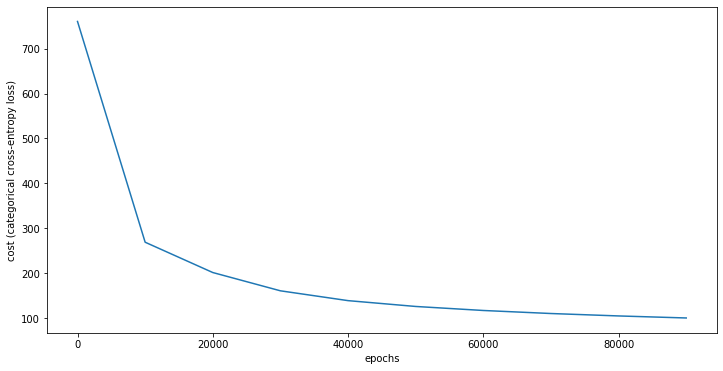

In [172]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.array(range(len(cost)))*10000, cost)
plt.xlabel('epochs')
plt.ylabel('cost (categorical cross-entropy loss)')
plt.show()

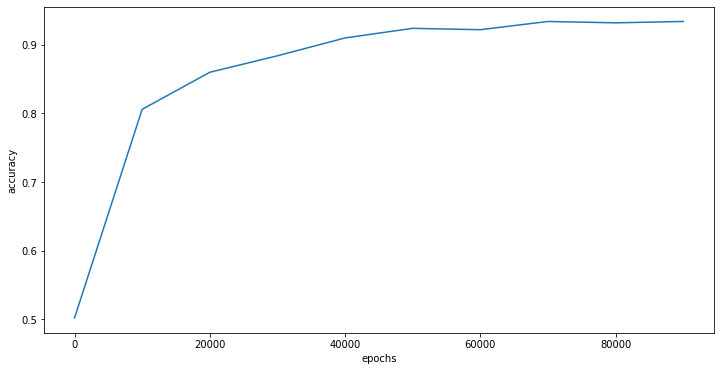

In [173]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.array(range(len(classification_rate)))*10000, classification_rate)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()